In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image

### Some Off Square
A circle is randomly generated by sampling two points uniformly and
independently from the interior of a square and using these points to determine its diameter. What is the probability
that the circle has a part of it that is off the square?
Give your
answer in exact terms
.

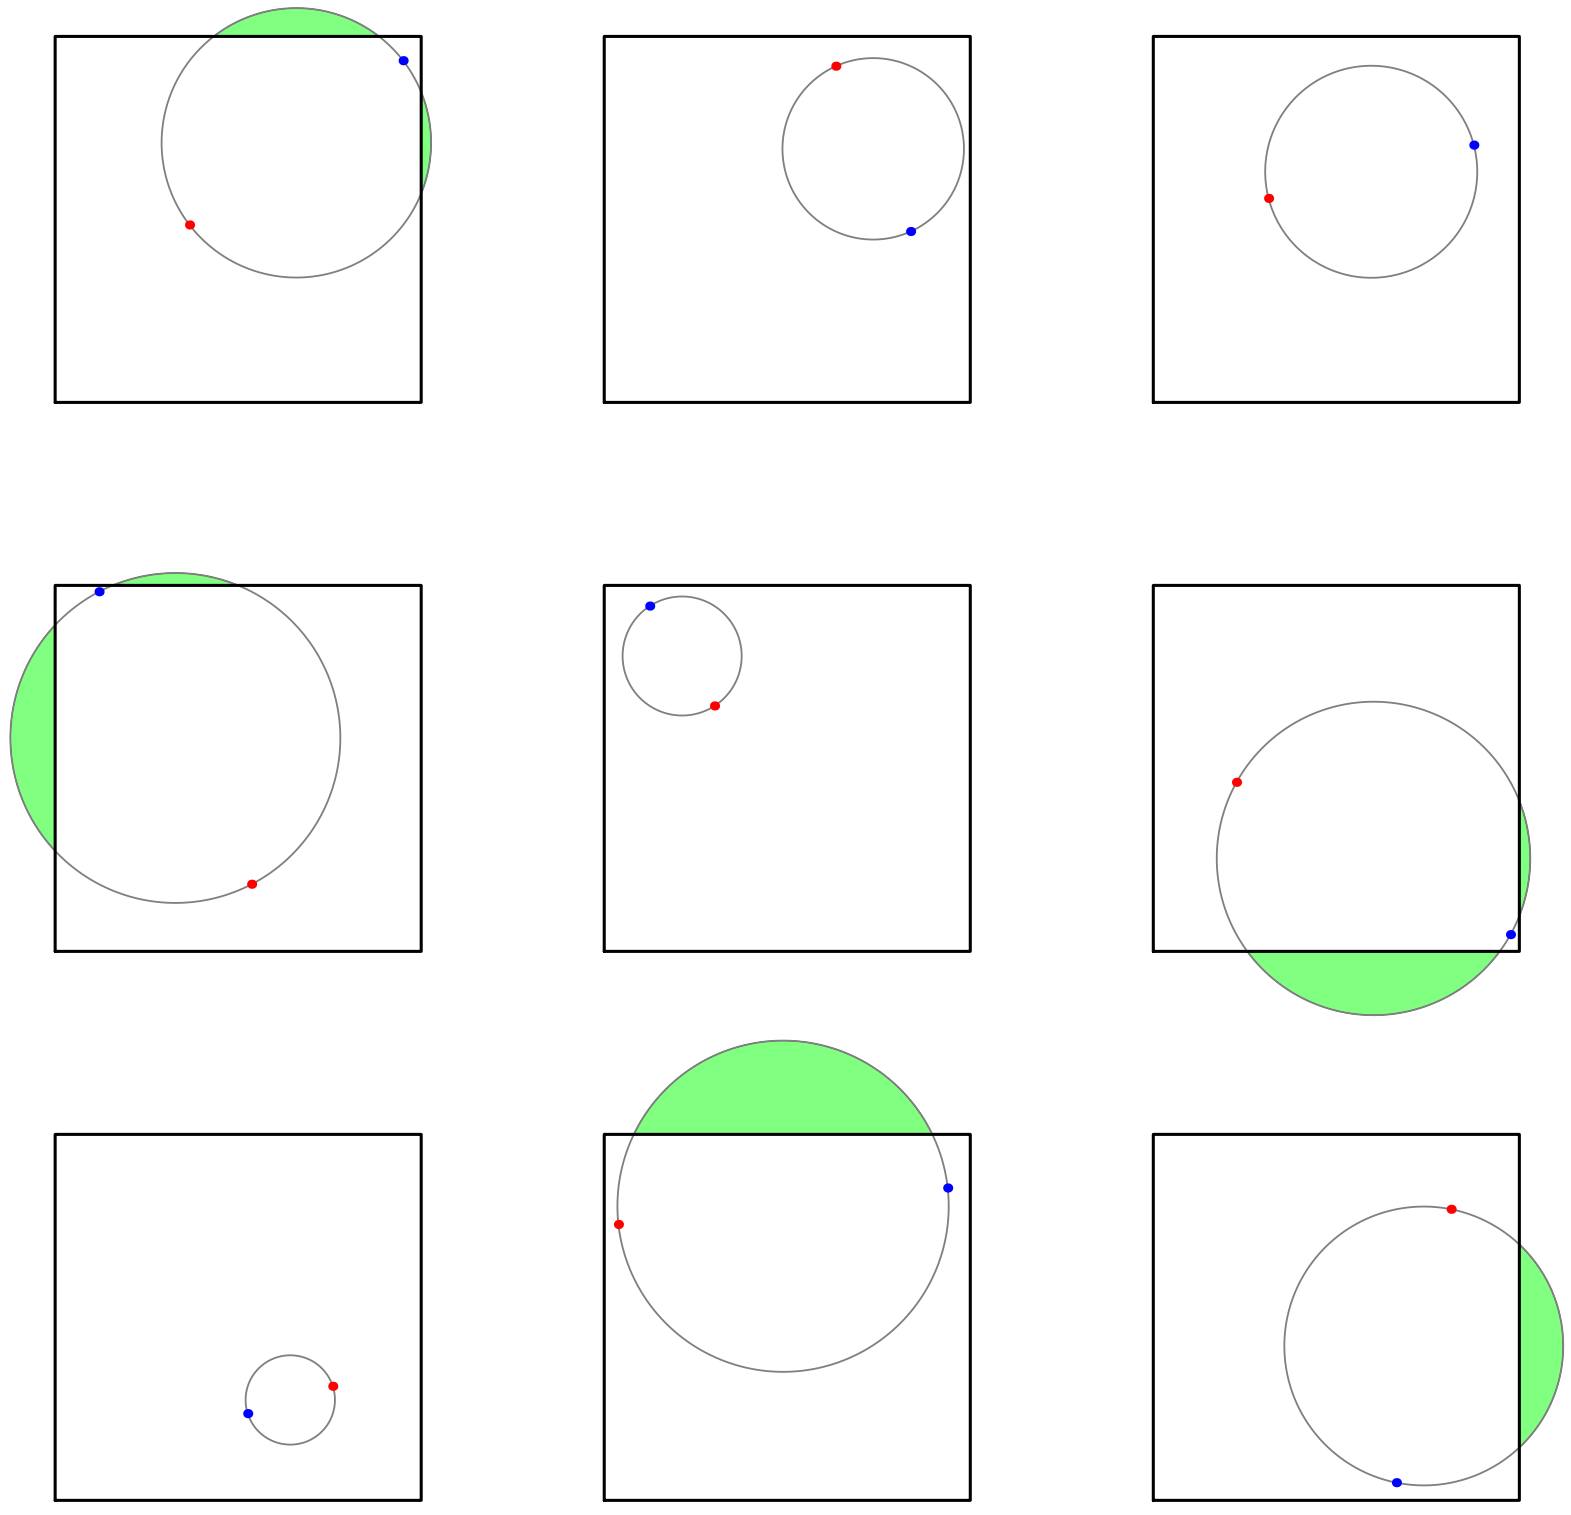

In [2]:
url='https://www.janestreet.com/puzzles/some-off-square-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text.replace(">","greater than") for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[13]+"\n"+"\n".join(y[16:19])))
display(Image('https://www.janestreet.com/puzzles/some_off_square.png',width=400))

__Approach__

Want to integrate along an axis the spirit of the single cross puzzles
To make this easier rewrite the end points of the diameter in terms of the centre and radius of the circle

$\begin{align}
&x_1=x+r\cos\phi\;,\\
&y_1=y+r\sin\phi\;,\\
&x_2=x-r\cos\phi\;,\\
&y_2=y-r\sin\phi\;
\end{align}$

Compute the Jacobian for the change of variables and then integrate over the x/y coords and the radius to get the proportion in the square

In [3]:
x,y,r,phi = sp.symbols('x y r phi')

Y = sp.Matrix([[x+r*sp.cos(phi),y+r*sp.sin(phi),x-r*sp.cos(phi),y-r*sp.sin(phi)]])
X = sp.Matrix([[x,y,r,phi]])
Y

Matrix([[r*cos(phi) + x, r*sin(phi) + y, -r*cos(phi) + x, -r*sin(phi) + y]])

In [4]:
Eq1 = Y.jacobian(X)
Eq1

Matrix([
[1, 0,  cos(phi), -r*sin(phi)],
[0, 1,  sin(phi),  r*cos(phi)],
[1, 0, -cos(phi),  r*sin(phi)],
[0, 1, -sin(phi), -r*cos(phi)]])

In [5]:
Eq2 = Eq1.det().simplify()
Eq2

4*r

- Use the octant 0 ≤ y ≤ x ≤ 1/2 so the circle will always breach the square on the bottom (y<0) if it breaches
- Multiply by 8 to get the full probabilty of being inside the square.
- Subtract from 1 to get the probability of being outside

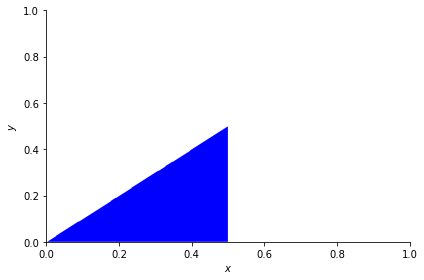

In [6]:
_ = sp.plot_implicit(sp.And(0<y,y<x,x<1/2),(x,0,1),(y,0,1))

In [7]:
Eq3 = 1-sp.Integral(Eq2,(phi,0,2*sp.pi),(r,0,y),(y,0,x),(x,0,sp.Rational(1,2)))*8
Eq3

1 - 8*Integral(4*r, (phi, 0, 2*pi), (r, 0, y), (y, 0, x), (x, 0, 1/2))

In [8]:
Eq4 = Eq3.doit()
Eq4

1 - pi/6

In [9]:
Eq4.evalf(n=6)

0.476401

In [10]:
# simulate to get an idea of the value
def off(a,b,c,d):
    radius = (((a-c)**2+(b-d)**2)**0.5)/2
    x = (a+c)/2
    y = (b+d)/2
    if (x-radius<0) or (x+radius>1) or (y-radius<0) or (y+radius>1):
        return 1
    else :
        return 0
   
def trial(n=10):
    tot = 0
    for i in range(n):
        tot +=off(*np.random.random(4))
    return (tot/n)

In [11]:
for z in range(3):
    print(trial(10**7))

0.476408
0.4761568
0.4765391


### Some Off Square
This month’s puzzle asked solvers to determine the likelihood that a circle with a randomly determined diameter — its endpoints chosen uniformly from within a square — would have some part of it protruding off the square.
One approach, sketched out in part above, is to instead consider the situation where the circle’s
center
and a point on the perimeter are chosen at random. One can show that there is a π/24 chance that the circle thus determined will be contained within the square.
Now, imagine choosing these circles by first selecting the point on the
perimeter
and then selecting the center. By doubling the vector from the perimeter point to the center, we get a vector which comprises the circle’s diameter. (That is, its new endpoint is the point one would need to select under the original problem statement in order to obtain the same circle.) However, with probability 3/4, that point is located outside the square! So the space of circles chosen by diameter is a uniform one-fourth of the circles chosen by radius. Crucially, all the circles that are entirely within the square can be selected by every diameter (by definition of them being entirely within the square), so the uniformity of the subspace is known for circles entirely contained within the square.
This means we have a π/6 chance of the circle being entirely within the square, so our answer is the complement
1
of this value, namely
1−π/6
.

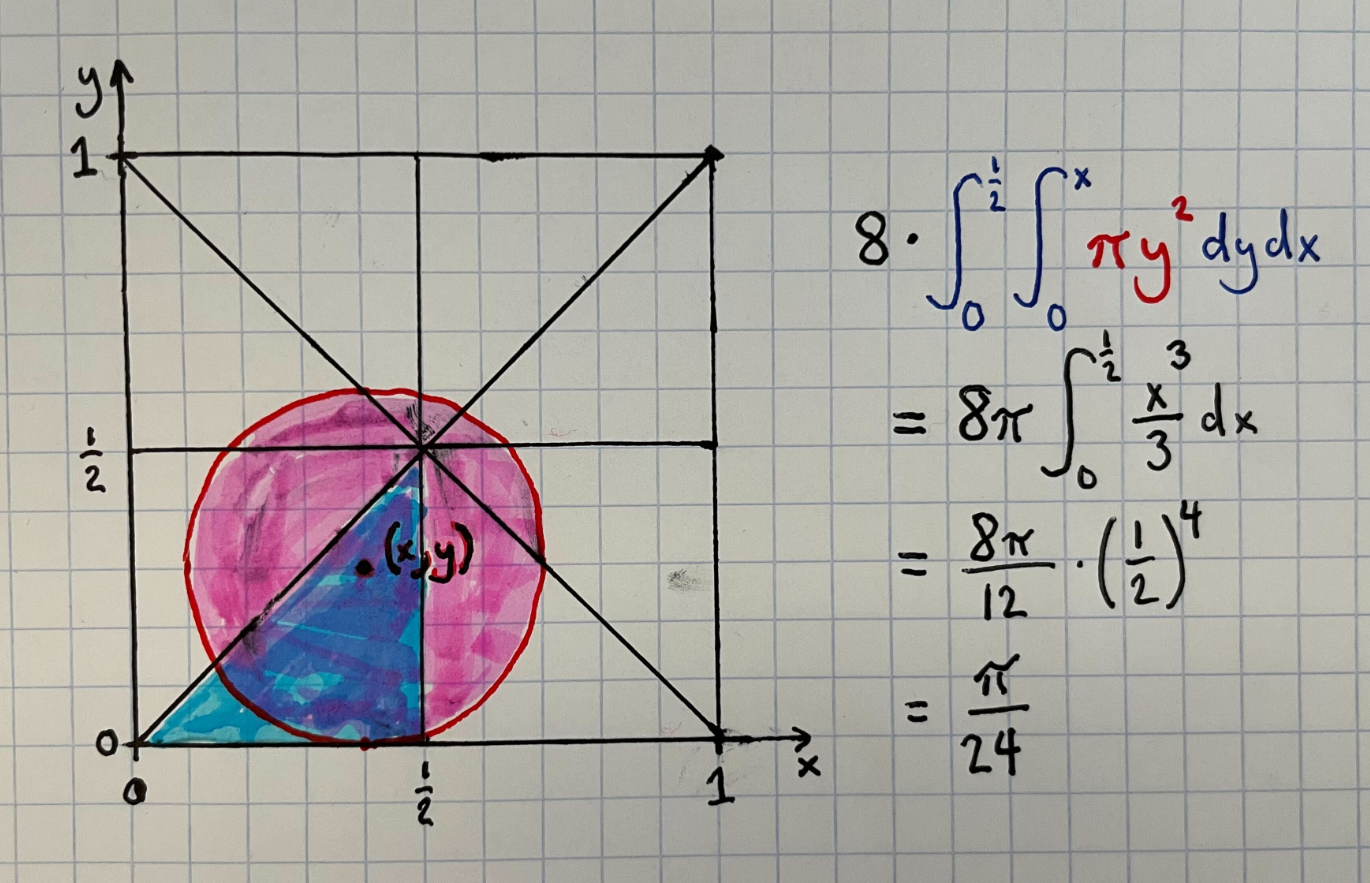

In [12]:
url='https://www.janestreet.com/puzzles/some-off-square-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text.replace(">","greater than") for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[13]+"\n"+"\n".join(y[16:28])))
display(Image('https://www.janestreet.com/puzzles/some-off-solution.png',width=400))